In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load cleaned data from Phase 1
df = pd.read_csv('BI_CSP_processed.csv')

df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income',
       'Kidsin_home', 'Teenin_home', 'Date_became_customer',
       'numberofdayssincelastpurchase', 'AmountspentDrinks',
       'AmountspentFruits', 'AmountspentMeat', 'AmountspentFish',
       'AmountspentSweet', 'AmountspentGold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'total_spent',
       'age', 'total_children', 'total_camp_accepted', 'Recency_Score',
       'Frequency_Score', 'Monetary_Score', 'RFM_Score', 'Churn_Risk',
       'fav_category', 'Deal_User_Type', 'Age_group', 'Has_child',
       'total_purchases', 'Country'],
      dtype='object')

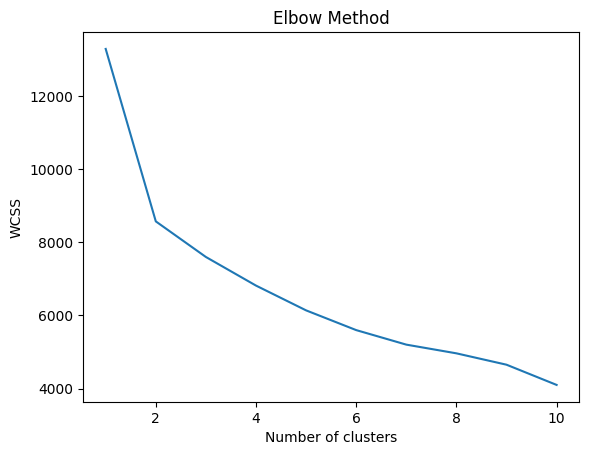

In [5]:
# 2. Select clustering features
cluster_features = df[[
    'Income', 
    'total_spent', 
    'total_purchases',
    'numberofdayssincelastpurchase',
    'total_children',
    'age'
]]

# 3. Standardize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_features)

# 4. Determine optimal clusters (Elbow Method)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
    
# Plot elbow curve (save for Looker Studio)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow_curve.png')